### The problematic eigenvalues for BDF3

The following plots show for each value of $x\in \lfloor13/\sqrt{\beta}\rfloor,\cdots,-9,-10$, how the mean fraction $\langle \delta\left(x,\Delta x\right)\rangle$ of the unstable eigenvalues (outside of the absolute stability region of BDF3) change with respect to $\Delta x$, where the number of Fourier modes is fixed at $8000$ and $\beta=2$ for all plots. Besides, for those unstable eigenvalues, we also show how the value of $\langle\mu(x,\Delta x)\rangle$ changes.

In [1]:
using TracyWidomBeta,LinearAlgebra,Plots

In [2]:
ρ = (α,z) -> (z.^(length(α)-1:-1:0))'*α
σ = (β,z) -> (z.^(length(β)-1:-1:0))'*β
R = (α,β,z) -> ρ(α,z)/σ(β,z)
function find_roots(c) # supposing that the leading order coefficient is 1
    # c contains the remaining coefficients
    r = length(c)
    A = zeros(Complex{Float64},r,r)
    A[1,:] = -c
    A[2:end,1:end-1] = A[2:end,1:end-1] + I # add identity matrix to lower-left block
    return eigvals(A)
end
function compute_roots(α,β,z)
    r = length(α)-1
    c = α-z*β
    if α[1]-z*β[1] ≈ 0.
        λ = find_roots(c[3:end]/c[2])
    else
        λ = find_roots(c[2:end]/c[1]) # let's suppose that first and second coefficients don't vanish simultaneously
    end
    return λ
end
function check_condition(λ)
    if maximum(abs.(λ)) > 1
        return 0
    else
        for i = 1:length(λ)
            if abs(λ[i]) ≈ 1. && sum(map(t -> λ[i] ≈ t,λ)) > 1
                return 0
            end
        end
    end
    return 1
end
function check_condition2(λ)
    ξ_rest=zeros(ComplexF64,0)
    for i=1:length(λ)
        if abs(λ[i])>1
            append!(ξ_rest,λ[i])
        elseif abs(λ[i]) ≈ 1. && sum(map(t -> λ[i] ≈ t,λ)) > 1
            append!(ξ_rest,λ[i])
        end
    end
    return ξ_rest
end
function root_condition(α,β,z)
    return compute_roots(α,β,z) |> check_condition
end

root_condition (generic function with 1 method)

Construct the matrices.

In [3]:
β=2;
M_f=1000;#just some random value
mgrid=(n,L) -> L*(1:n)/n;
θ=mgrid(M_f,pi);
M_s=8000;
h=(1/M_f)*pi;
method="spectral";
l=10;
(A,B)=TracyWidomBeta.matrix_gen(β;method,M_f,M_s,h,θ,l);

For $x=-10$, we have

In [4]:
Delta_x=[-1,-0.5,-0.2,-0.1,-0.05,-0.04,-0.02,-0.01,-0.005,-0.004,-0.002,-0.001,-0.0005,-0.0002,-0.0001];
r_leftm10=zeros(1,length(Delta_x));r_rightm10=zeros(1,length(Delta_x));
v_leftm10=zeros(1,length(Delta_x));v_rightm10=zeros(1,length(Delta_x));
Z_left=zeros(ComplexF64,0);Z_right=zeros(ComplexF64,0);
α = [11/6,-3,3/2,-1/3];β = [1,0,0,0];
C=A-10*B;
Eig=eigvals(Matrix(C));
for j=1:length(Delta_x)
    z_left=zeros(ComplexF64,0);z_right=zeros(ComplexF64,0);
    ξ_left=zeros(ComplexF64,0);ξ_right=zeros(ComplexF64,0);
    Δx=Delta_x[j]
    z=Δx*Eig;
    for i=1:length(z)
        ξ=compute_roots(α,β,z[i])
        if real(z[i])>0 && check_condition(ξ)==0
            append!(z_right,z[i])
            append!(ξ_right,ξ)
        end
        if real(z[i])<0 && check_condition(ξ)==0
            append!(z_left,z[i])
            append!(ξ_left,ξ)
        end
        if real(z[i])>0 && check_condition(ξ)==0 && Δx==-0.004
            append!(Z_right,z[i])
        end
        if real(z[i])<0 && check_condition(ξ)==0 && Δx==-0.004
            append!(Z_left,z[i])
        end
        if real(z[i])>0 && check_condition(ξ)==0 && Δx==-0.002
            append!(Z_right,z[i])
        end
        if real(z[i])<0 && check_condition(ξ)==0 && Δx==-0.002
            append!(Z_left,z[i])
        end
    end
    r_leftm10[j]=length(z_left)/(2*M_s+1);
    r_rightm10[j]=length(z_right)/(2*M_s+1);
    if length(ξ_left)==0
        v_leftm10[j]=0
    end
    if length(ξ_right)==0
        v_rightm10[j]=0
    end
    if length(ξ_left)>0
        ξ_restl=check_condition2(ξ_left)
        μ_left=abs.((abs.(ξ_restl).-1)./Δx)
        v_leftm10[j]=maximum(μ_left)
    end
    if length(ξ_right)>0
        ξ_restr=check_condition2(ξ_right)
        μ_right=abs.((abs.(ξ_restr).-1)./Δx)
        v_rightm10[j]=maximum(μ_right)
    end
end

For $x=-9$, we have

In [5]:
Delta_x=[-1,-0.5,-0.2,-0.1,-0.05,-0.04,-0.02,-0.01,-0.005,-0.004,-0.002,-0.001,-0.0005,-0.0002,-0.0001];
r_leftm9=zeros(1,length(Delta_x));r_rightm9=zeros(1,length(Delta_x));
v_leftm9=zeros(1,length(Delta_x));v_rightm9=zeros(1,length(Delta_x));
α = [11/6,-3,3/2,-1/3];β = [1,0,0,0];
C=A-9*B;
Eig=eigvals(Matrix(C));
for j=1:length(Delta_x)
    z_left=zeros(ComplexF64,0);z_right=zeros(ComplexF64,0);
    ξ_left=zeros(ComplexF64,0);ξ_right=zeros(ComplexF64,0);
    Δx=Delta_x[j]
    z=Δx*Eig;
    for i=1:length(z)
        ξ=compute_roots(α,β,z[i])
        if real(z[i])>0 && check_condition(ξ)==0
            append!(z_right,z[i])
            append!(ξ_right,ξ)
        end
        if real(z[i])<0 && check_condition(ξ)==0
            append!(z_left,z[i])
            append!(ξ_left,ξ)
        end
        if real(z[i])>0 && check_condition(ξ)==0 && Δx==-0.004
            append!(Z_right,z[i])
        end
        if real(z[i])<0 && check_condition(ξ)==0 && Δx==-0.004
            append!(Z_left,z[i])
        end
        if real(z[i])>0 && check_condition(ξ)==0 && Δx==-0.002
            append!(Z_right,z[i])
        end
        if real(z[i])<0 && check_condition(ξ)==0 && Δx==-0.002
            append!(Z_left,z[i])
        end
    end
    r_leftm9[j]=length(z_left)/(2*M_s+1);
    r_rightm9[j]=length(z_right)/(2*M_s+1);
    if length(ξ_left)==0
        v_leftm9[j]=0
    end
    if length(ξ_right)==0
        v_rightm9[j]=0
    end
    if length(ξ_left)>0
        ξ_restl=check_condition2(ξ_left)
        μ_left=abs.((abs.(ξ_restl).-1)./Δx)
        v_leftm9[j]=maximum(μ_left)
    end
    if length(ξ_right)>0
        ξ_restr=check_condition2(ξ_right)
        μ_right=abs.((abs.(ξ_restr).-1)./Δx)
        v_rightm9[j]=maximum(μ_right)
    end
end

For $x=-8$, we have

In [6]:
Delta_x=[-1,-0.5,-0.2,-0.1,-0.05,-0.04,-0.02,-0.01,-0.005,-0.004,-0.002,-0.001,-0.0005,-0.0002,-0.0001];
r_leftm8=zeros(1,length(Delta_x));r_rightm8=zeros(1,length(Delta_x));
v_leftm8=zeros(1,length(Delta_x));v_rightm8=zeros(1,length(Delta_x));
α = [11/6,-3,3/2,-1/3];β = [1,0,0,0];
C=A-8*B;
Eig=eigvals(Matrix(C));
for j=1:length(Delta_x)
    z_left=zeros(ComplexF64,0);z_right=zeros(ComplexF64,0);
    ξ_left=zeros(ComplexF64,0);ξ_right=zeros(ComplexF64,0);
    Δx=Delta_x[j]
    z=Δx*Eig;
    for i=1:length(z)
        ξ=compute_roots(α,β,z[i])
        if real(z[i])>0 && check_condition(ξ)==0
            append!(z_right,z[i])
            append!(ξ_right,ξ)
        end
        if real(z[i])<0 && check_condition(ξ)==0
            append!(z_left,z[i])
            append!(ξ_left,ξ)
        end
        if real(z[i])>0 && check_condition(ξ)==0 && Δx==-0.004
            append!(Z_right,z[i])
        end
        if real(z[i])<0 && check_condition(ξ)==0 && Δx==-0.004
            append!(Z_left,z[i])
        end
        if real(z[i])>0 && check_condition(ξ)==0 && Δx==-0.002
            append!(Z_right,z[i])
        end
        if real(z[i])<0 && check_condition(ξ)==0 && Δx==-0.002
            append!(Z_left,z[i])
        end
    end
    r_leftm8[j]=length(z_left)/(2*M_s+1);
    r_rightm8[j]=length(z_right)/(2*M_s+1);
    if length(ξ_left)==0
        v_leftm8[j]=0
    end
    if length(ξ_right)==0
        v_rightm8[j]=0
    end
    if length(ξ_left)>0
        ξ_restl=check_condition2(ξ_left)
        μ_left=abs.((abs.(ξ_restl).-1)./Δx)
        v_leftm8[j]=maximum(μ_left)
    end
    if length(ξ_right)>0
        ξ_restr=check_condition2(ξ_right)
        μ_right=abs.((abs.(ξ_restr).-1)./Δx)
        v_rightm8[j]=maximum(μ_right)
    end
end

For $x=-7$, we have

In [7]:
Delta_x=[-1,-0.5,-0.2,-0.1,-0.05,-0.04,-0.02,-0.01,-0.005,-0.004,-0.002,-0.001,-0.0005,-0.0002,-0.0001];
r_leftm7=zeros(1,length(Delta_x));r_rightm7=zeros(1,length(Delta_x));
v_leftm7=zeros(1,length(Delta_x));v_rightm7=zeros(1,length(Delta_x));
α = [11/6,-3,3/2,-1/3];β = [1,0,0,0];
C=A-7*B;
Eig=eigvals(Matrix(C));
for j=1:length(Delta_x)
    z_left=zeros(ComplexF64,0);z_right=zeros(ComplexF64,0);
    ξ_left=zeros(ComplexF64,0);ξ_right=zeros(ComplexF64,0);
    Δx=Delta_x[j]
    z=Δx*Eig;
    for i=1:length(z)
        ξ=compute_roots(α,β,z[i])
        if real(z[i])>0 && check_condition(ξ)==0
            append!(z_right,z[i])
            append!(ξ_right,ξ)
        end
        if real(z[i])<0 && check_condition(ξ)==0
            append!(z_left,z[i])
            append!(ξ_left,ξ)
        end
        if real(z[i])>0 && check_condition(ξ)==0 && Δx==-0.004
            append!(Z_right,z[i])
        end
        if real(z[i])<0 && check_condition(ξ)==0 && Δx==-0.004
            append!(Z_left,z[i])
        end
        if real(z[i])>0 && check_condition(ξ)==0 && Δx==-0.002
            append!(Z_right,z[i])
        end
        if real(z[i])<0 && check_condition(ξ)==0 && Δx==-0.002
            append!(Z_left,z[i])
        end
    end
    r_leftm7[j]=length(z_left)/(2*M_s+1);
    r_rightm7[j]=length(z_right)/(2*M_s+1);
    if length(ξ_left)==0
        v_leftm7[j]=0
    end
    if length(ξ_right)==0
        v_rightm7[j]=0
    end
    if length(ξ_left)>0
        ξ_restl=check_condition2(ξ_left)
        μ_left=abs.((abs.(ξ_restl).-1)./Δx)
        v_leftm7[j]=maximum(μ_left)
    end
    if length(ξ_right)>0
        ξ_restr=check_condition2(ξ_right)
        μ_right=abs.((abs.(ξ_restr).-1)./Δx)
        v_rightm7[j]=maximum(μ_right)
    end
end

For $x=-6$, we have

In [8]:
Delta_x=[-1,-0.5,-0.2,-0.1,-0.05,-0.04,-0.02,-0.01,-0.005,-0.004,-0.002,-0.001,-0.0005,-0.0002,-0.0001];
r_leftm6=zeros(1,length(Delta_x));r_rightm6=zeros(1,length(Delta_x));
v_leftm6=zeros(1,length(Delta_x));v_rightm6=zeros(1,length(Delta_x));
α = [11/6,-3,3/2,-1/3];β = [1,0,0,0];
C=A-6*B;
Eig=eigvals(Matrix(C));
for j=1:length(Delta_x)
    z_left=zeros(ComplexF64,0);z_right=zeros(ComplexF64,0);
    ξ_left=zeros(ComplexF64,0);ξ_right=zeros(ComplexF64,0);
    Δx=Delta_x[j]
    z=Δx*Eig;
    for i=1:length(z)
        ξ=compute_roots(α,β,z[i])
        if real(z[i])>0 && check_condition(ξ)==0
            append!(z_right,z[i])
            append!(ξ_right,ξ)
        end
        if real(z[i])<0 && check_condition(ξ)==0
            append!(z_left,z[i])
            append!(ξ_left,ξ)
        end
        if real(z[i])>0 && check_condition(ξ)==0 && Δx==-0.004
            append!(Z_right,z[i])
        end
        if real(z[i])<0 && check_condition(ξ)==0 && Δx==-0.004
            append!(Z_left,z[i])
        end
        if real(z[i])>0 && check_condition(ξ)==0 && Δx==-0.002
            append!(Z_right,z[i])
        end
        if real(z[i])<0 && check_condition(ξ)==0 && Δx==-0.002
            append!(Z_left,z[i])
        end
    end
    r_leftm6[j]=length(z_left)/(2*M_s+1);
    r_rightm6[j]=length(z_right)/(2*M_s+1);
    if length(ξ_left)==0
        v_leftm6[j]=0
    end
    if length(ξ_right)==0
        v_rightm6[j]=0
    end
    if length(ξ_left)>0
        ξ_restl=check_condition2(ξ_left)
        μ_left=abs.((abs.(ξ_restl).-1)./Δx)
        v_leftm6[j]=maximum(μ_left)
    end
    if length(ξ_right)>0
        ξ_restr=check_condition2(ξ_right)
        μ_right=abs.((abs.(ξ_restr).-1)./Δx)
        v_rightm6[j]=maximum(μ_right)
    end
end

For $x=-5$, we have

In [9]:
Delta_x=[-1,-0.5,-0.2,-0.1,-0.05,-0.04,-0.02,-0.01,-0.005,-0.004,-0.002,-0.001,-0.0005,-0.0002,-0.0001];
r_leftm5=zeros(1,length(Delta_x));r_rightm5=zeros(1,length(Delta_x));
v_leftm5=zeros(1,length(Delta_x));v_rightm5=zeros(1,length(Delta_x));
α = [11/6,-3,3/2,-1/3];β = [1,0,0,0];
C=A-5*B;
Eig=eigvals(Matrix(C));
for j=1:length(Delta_x)
    z_left=zeros(ComplexF64,0);z_right=zeros(ComplexF64,0);
    ξ_left=zeros(ComplexF64,0);ξ_right=zeros(ComplexF64,0);
    Δx=Delta_x[j]
    z=Δx*Eig;
    for i=1:length(z)
        ξ=compute_roots(α,β,z[i])
        if real(z[i])>0 && check_condition(ξ)==0
            append!(z_right,z[i])
            append!(ξ_right,ξ)
        end
        if real(z[i])<0 && check_condition(ξ)==0
            append!(z_left,z[i])
            append!(ξ_left,ξ)
        end
        if real(z[i])>0 && check_condition(ξ)==0 && Δx==-0.004
            append!(Z_right,z[i])
        end
        if real(z[i])<0 && check_condition(ξ)==0 && Δx==-0.004
            append!(Z_left,z[i])
        end
        if real(z[i])>0 && check_condition(ξ)==0 && Δx==-0.002
            append!(Z_right,z[i])
        end
        if real(z[i])<0 && check_condition(ξ)==0 && Δx==-0.002
            append!(Z_left,z[i])
        end
    end
    r_leftm5[j]=length(z_left)/(2*M_s+1);
    r_rightm5[j]=length(z_right)/(2*M_s+1);
    if length(ξ_left)==0
        v_leftm5[j]=0
    end
    if length(ξ_right)==0
        v_rightm5[j]=0
    end
    if length(ξ_left)>0
        ξ_restl=check_condition2(ξ_left)
        μ_left=abs.((abs.(ξ_restl).-1)./Δx)
        v_leftm5[j]=maximum(μ_left)
    end
    if length(ξ_right)>0
        ξ_restr=check_condition2(ξ_right)
        μ_right=abs.((abs.(ξ_restr).-1)./Δx)
        v_rightm5[j]=maximum(μ_right)
    end
end

For $x=-4$, we have

In [10]:
Delta_x=[-1,-0.5,-0.2,-0.1,-0.05,-0.04,-0.02,-0.01,-0.005,-0.004,-0.002,-0.001,-0.0005,-0.0002,-0.0001];
r_leftm4=zeros(1,length(Delta_x));r_rightm4=zeros(1,length(Delta_x));
v_leftm4=zeros(1,length(Delta_x));v_rightm4=zeros(1,length(Delta_x));
α = [11/6,-3,3/2,-1/3];β = [1,0,0,0];
C=A-4*B;
Eig=eigvals(Matrix(C));
for j=1:length(Delta_x)
    z_left=zeros(ComplexF64,0);z_right=zeros(ComplexF64,0);
    ξ_left=zeros(ComplexF64,0);ξ_right=zeros(ComplexF64,0);
    Δx=Delta_x[j]
    z=Δx*Eig;
    for i=1:length(z)
        ξ=compute_roots(α,β,z[i])
        if real(z[i])>0 && check_condition(ξ)==0
            append!(z_right,z[i])
            append!(ξ_right,ξ)
        end
        if real(z[i])<0 && check_condition(ξ)==0
            append!(z_left,z[i])
            append!(ξ_left,ξ)
        end
        if real(z[i])>0 && check_condition(ξ)==0 && Δx==-0.004
            append!(Z_right,z[i])
        end
        if real(z[i])<0 && check_condition(ξ)==0 && Δx==-0.004
            append!(Z_left,z[i])
        end
        if real(z[i])>0 && check_condition(ξ)==0 && Δx==-0.002
            append!(Z_right,z[i])
        end
        if real(z[i])<0 && check_condition(ξ)==0 && Δx==-0.002
            append!(Z_left,z[i])
        end
    end
    r_leftm4[j]=length(z_left)/(2*M_s+1);
    r_rightm4[j]=length(z_right)/(2*M_s+1);
    if length(ξ_left)==0
        v_leftm4[j]=0
    end
    if length(ξ_right)==0
        v_rightm4[j]=0
    end
    if length(ξ_left)>0
        ξ_restl=check_condition2(ξ_left)
        μ_left=abs.((abs.(ξ_restl).-1)./Δx)
        v_leftm4[j]=maximum(μ_left)
    end
    if length(ξ_right)>0
        ξ_restr=check_condition2(ξ_right)
        μ_right=abs.((abs.(ξ_restr).-1)./Δx)
        v_rightm4[j]=maximum(μ_right)
    end
end

For $x=-3$, we have

In [11]:
Delta_x=[-1,-0.5,-0.2,-0.1,-0.05,-0.04,-0.02,-0.01,-0.005,-0.004,-0.002,-0.001,-0.0005,-0.0002,-0.0001];
r_leftm3=zeros(1,length(Delta_x));r_rightm3=zeros(1,length(Delta_x));
v_leftm3=zeros(1,length(Delta_x));v_rightm3=zeros(1,length(Delta_x));
α = [11/6,-3,3/2,-1/3];β = [1,0,0,0];
C=A-3*B;
Eig=eigvals(Matrix(C));
for j=1:length(Delta_x)
    z_left=zeros(ComplexF64,0);z_right=zeros(ComplexF64,0);
    ξ_left=zeros(ComplexF64,0);ξ_right=zeros(ComplexF64,0);
    Δx=Delta_x[j]
    z=Δx*Eig;
    for i=1:length(z)
        ξ=compute_roots(α,β,z[i])
        if real(z[i])>0 && check_condition(ξ)==0
            append!(z_right,z[i])
            append!(ξ_right,ξ)
        end
        if real(z[i])<0 && check_condition(ξ)==0
            append!(z_left,z[i])
            append!(ξ_left,ξ)
        end
        if real(z[i])>0 && check_condition(ξ)==0 && Δx==-0.004
            append!(Z_right,z[i])
        end
        if real(z[i])<0 && check_condition(ξ)==0 && Δx==-0.004
            append!(Z_left,z[i])
        end
        if real(z[i])>0 && check_condition(ξ)==0 && Δx==-0.002
            append!(Z_right,z[i])
        end
        if real(z[i])<0 && check_condition(ξ)==0 && Δx==-0.002
            append!(Z_left,z[i])
        end
    end
    r_leftm3[j]=length(z_left)/(2*M_s+1);
    r_rightm3[j]=length(z_right)/(2*M_s+1);
    if length(ξ_left)==0
        v_leftm3[j]=0
    end
    if length(ξ_right)==0
        v_rightm3[j]=0
    end
    if length(ξ_left)>0
        ξ_restl=check_condition2(ξ_left)
        μ_left=abs.((abs.(ξ_restl).-1)./Δx)
        v_leftm3[j]=maximum(μ_left)
    end
    if length(ξ_right)>0
        ξ_restr=check_condition2(ξ_right)
        μ_right=abs.((abs.(ξ_restr).-1)./Δx)
        v_rightm3[j]=maximum(μ_right)
    end
end

For $x=-2$, we have

In [12]:
Delta_x=[-1,-0.5,-0.2,-0.1,-0.05,-0.04,-0.02,-0.01,-0.005,-0.004,-0.002,-0.001,-0.0005,-0.0002,-0.0001];
r_leftm2=zeros(1,length(Delta_x));r_rightm2=zeros(1,length(Delta_x));
v_leftm2=zeros(1,length(Delta_x));v_rightm2=zeros(1,length(Delta_x));
α = [11/6,-3,3/2,-1/3];β = [1,0,0,0];
C=A-2*B;
Eig=eigvals(Matrix(C));
for j=1:length(Delta_x)
    z_left=zeros(ComplexF64,0);z_right=zeros(ComplexF64,0);
    ξ_left=zeros(ComplexF64,0);ξ_right=zeros(ComplexF64,0);
    Δx=Delta_x[j]
    z=Δx*Eig;
    for i=1:length(z)
        ξ=compute_roots(α,β,z[i])
        if real(z[i])>0 && check_condition(ξ)==0
            append!(z_right,z[i])
            append!(ξ_right,ξ)
        end
        if real(z[i])<0 && check_condition(ξ)==0
            append!(z_left,z[i])
            append!(ξ_left,ξ)
        end
        if real(z[i])>0 && check_condition(ξ)==0 && Δx==-0.004
            append!(Z_right,z[i])
        end
        if real(z[i])<0 && check_condition(ξ)==0 && Δx==-0.004
            append!(Z_left,z[i])
        end
        if real(z[i])>0 && check_condition(ξ)==0 && Δx==-0.002
            append!(Z_right,z[i])
        end
        if real(z[i])<0 && check_condition(ξ)==0 && Δx==-0.002
            append!(Z_left,z[i])
        end
    end
    r_leftm2[j]=length(z_left)/(2*M_s+1);
    r_rightm2[j]=length(z_right)/(2*M_s+1);
    if length(ξ_left)==0
        v_leftm2[j]=0
    end
    if length(ξ_right)==0
        v_rightm2[j]=0
    end
    if length(ξ_left)>0
        ξ_restl=check_condition2(ξ_left)
        μ_left=abs.((abs.(ξ_restl).-1)./Δx)
        v_leftm2[j]=maximum(μ_left)
    end
    if length(ξ_right)>0
        ξ_restr=check_condition2(ξ_right)
        μ_right=abs.((abs.(ξ_restr).-1)./Δx)
        v_rightm2[j]=maximum(μ_right)
    end
end

For $x=-1$, we have

In [13]:
Delta_x=[-1,-0.5,-0.2,-0.1,-0.05,-0.04,-0.02,-0.01,-0.005,-0.004,-0.002,-0.001,-0.0005,-0.0002,-0.0001];
r_leftm1=zeros(1,length(Delta_x));r_rightm1=zeros(1,length(Delta_x));
v_leftm1=zeros(1,length(Delta_x));v_rightm1=zeros(1,length(Delta_x));
α = [11/6,-3,3/2,-1/3];β = [1,0,0,0];
C=A-1*B;
Eig=eigvals(Matrix(C));
for j=1:length(Delta_x)
    z_left=zeros(ComplexF64,0);z_right=zeros(ComplexF64,0);
    ξ_left=zeros(ComplexF64,0);ξ_right=zeros(ComplexF64,0);
    Δx=Delta_x[j]
    z=Δx*Eig;
    for i=1:length(z)
        ξ=compute_roots(α,β,z[i])
        if real(z[i])>0 && check_condition(ξ)==0
            append!(z_right,z[i])
            append!(ξ_right,ξ)
        end
        if real(z[i])<0 && check_condition(ξ)==0
            append!(z_left,z[i])
            append!(ξ_left,ξ)
        end
        if real(z[i])>0 && check_condition(ξ)==0 && Δx==-0.004
            append!(Z_right,z[i])
        end
        if real(z[i])<0 && check_condition(ξ)==0 && Δx==-0.004
            append!(Z_left,z[i])
        end
        if real(z[i])>0 && check_condition(ξ)==0 && Δx==-0.002
            append!(Z_right,z[i])
        end
        if real(z[i])<0 && check_condition(ξ)==0 && Δx==-0.002
            append!(Z_left,z[i])
        end
    end
    r_leftm1[j]=length(z_left)/(2*M_s+1);
    r_rightm1[j]=length(z_right)/(2*M_s+1);
    if length(ξ_left)==0
        v_leftm1[j]=0
    end
    if length(ξ_right)==0
        v_rightm1[j]=0
    end
    if length(ξ_left)>0
        ξ_restl=check_condition2(ξ_left)
        μ_left=abs.((abs.(ξ_restl).-1)./Δx)
        v_leftm1[j]=maximum(μ_left)
    end
    if length(ξ_right)>0
        ξ_restr=check_condition2(ξ_right)
        μ_right=abs.((abs.(ξ_restr).-1)./Δx)
        v_rightm1[j]=maximum(μ_right)
    end
end

For $x=0$, we have

In [14]:
Delta_x=[-1,-0.5,-0.2,-0.1,-0.05,-0.04,-0.02,-0.01,-0.005,-0.004,-0.002,-0.001,-0.0005,-0.0002,-0.0001];
r_left0=zeros(1,length(Delta_x));r_right0=zeros(1,length(Delta_x));
v_left0=zeros(1,length(Delta_x));v_right0=zeros(1,length(Delta_x));
α = [11/6,-3,3/2,-1/3];β = [1,0,0,0];
C=A-0*B;
Eig=eigvals(Matrix(C));
for j=1:length(Delta_x)
    z_left=zeros(ComplexF64,0);z_right=zeros(ComplexF64,0);
    ξ_left=zeros(ComplexF64,0);ξ_right=zeros(ComplexF64,0);
    Δx=Delta_x[j]
    z=Δx*Eig;
    for i=1:length(z)
        ξ=compute_roots(α,β,z[i])
        if real(z[i])>0 && check_condition(ξ)==0
            append!(z_right,z[i])
            append!(ξ_right,ξ)
        end
        if real(z[i])<0 && check_condition(ξ)==0
            append!(z_left,z[i])
            append!(ξ_left,ξ)
        end
        if real(z[i])>0 && check_condition(ξ)==0 && Δx==-0.004
            append!(Z_right,z[i])
        end
        if real(z[i])<0 && check_condition(ξ)==0 && Δx==-0.004
            append!(Z_left,z[i])
        end
        if real(z[i])>0 && check_condition(ξ)==0 && Δx==-0.002
            append!(Z_right,z[i])
        end
        if real(z[i])<0 && check_condition(ξ)==0 && Δx==-0.002
            append!(Z_left,z[i])
        end
    end
    r_left0[j]=length(z_left)/(2*M_s+1);
    r_right0[j]=length(z_right)/(2*M_s+1);
    if length(ξ_left)==0
        v_left0[j]=0
    end
    if length(ξ_right)==0
        v_right0[j]=0
    end
    if length(ξ_left)>0
        ξ_restl=check_condition2(ξ_left)
        μ_left=abs.((abs.(ξ_restl).-1)./Δx)
        v_left0[j]=maximum(μ_left)
    end
    if length(ξ_right)>0
        ξ_restr=check_condition2(ξ_right)
        μ_right=abs.((abs.(ξ_restr).-1)./Δx)
        v_right0[j]=maximum(μ_right)
    end
end

For $x=1$, we have

In [15]:
Delta_x=[-1,-0.5,-0.2,-0.1,-0.05,-0.04,-0.02,-0.01,-0.005,-0.004,-0.002,-0.001,-0.0005,-0.0002,-0.0001];
r_left1=zeros(1,length(Delta_x));r_right1=zeros(1,length(Delta_x));
v_left1=zeros(1,length(Delta_x));v_right1=zeros(1,length(Delta_x));
α = [11/6,-3,3/2,-1/3];β = [1,0,0,0];
C=A+1*B;
Eig=eigvals(Matrix(C));
for j=1:length(Delta_x)
    z_left=zeros(ComplexF64,0);z_right=zeros(ComplexF64,0);
    ξ_left=zeros(ComplexF64,0);ξ_right=zeros(ComplexF64,0);
    Δx=Delta_x[j]
    z=Δx*Eig;
    for i=1:length(z)
        ξ=compute_roots(α,β,z[i])
        if real(z[i])>0 && check_condition(ξ)==0
            append!(z_right,z[i])
            append!(ξ_right,ξ)
        end
        if real(z[i])<0 && check_condition(ξ)==0
            append!(z_left,z[i])
            append!(ξ_left,ξ)
        end
        if real(z[i])>0 && check_condition(ξ)==0 && Δx==-0.004
            append!(Z_right,z[i])
        end
        if real(z[i])<0 && check_condition(ξ)==0 && Δx==-0.004
            append!(Z_left,z[i])
        end
        if real(z[i])>0 && check_condition(ξ)==0 && Δx==-0.002
            append!(Z_right,z[i])
        end
        if real(z[i])<0 && check_condition(ξ)==0 && Δx==-0.002
            append!(Z_left,z[i])
        end
    end
    r_left1[j]=length(z_left)/(2*M_s+1);
    r_right1[j]=length(z_right)/(2*M_s+1);
    if length(ξ_left)==0
        v_left1[j]=0
    end
    if length(ξ_right)==0
        v_right1[j]=0
    end
    if length(ξ_left)>0
        ξ_restl=check_condition2(ξ_left)
        μ_left=abs.((abs.(ξ_restl).-1)./Δx)
        v_left1[j]=maximum(μ_left)
    end
    if length(ξ_right)>0
        ξ_restr=check_condition2(ξ_right)
        μ_right=abs.((abs.(ξ_restr).-1)./Δx)
        v_right1[j]=maximum(μ_right)
    end
end

For $x=2$, we have

In [16]:
Delta_x=[-1,-0.5,-0.2,-0.1,-0.05,-0.04,-0.02,-0.01,-0.005,-0.004,-0.002,-0.001,-0.0005,-0.0002,-0.0001];
r_left2=zeros(1,length(Delta_x));r_right2=zeros(1,length(Delta_x));
v_left2=zeros(1,length(Delta_x));v_right2=zeros(1,length(Delta_x));
α = [11/6,-3,3/2,-1/3];β = [1,0,0,0];
C=A+2*B;
Eig=eigvals(Matrix(C));
for j=1:length(Delta_x)
    z_left=zeros(ComplexF64,0);z_right=zeros(ComplexF64,0);
    ξ_left=zeros(ComplexF64,0);ξ_right=zeros(ComplexF64,0);
    Δx=Delta_x[j]
    z=Δx*Eig;
    for i=1:length(z)
        ξ=compute_roots(α,β,z[i])
        if real(z[i])>0 && check_condition(ξ)==0
            append!(z_right,z[i])
            append!(ξ_right,ξ)
        end
        if real(z[i])<0 && check_condition(ξ)==0
            append!(z_left,z[i])
            append!(ξ_left,ξ)
        end
        if real(z[i])>0 && check_condition(ξ)==0 && Δx==-0.004
            append!(Z_right,z[i])
        end
        if real(z[i])<0 && check_condition(ξ)==0 && Δx==-0.004
            append!(Z_left,z[i])
        end
        if real(z[i])>0 && check_condition(ξ)==0 && Δx==-0.002
            append!(Z_right,z[i])
        end
        if real(z[i])<0 && check_condition(ξ)==0 && Δx==-0.002
            append!(Z_left,z[i])
        end
    end
    r_left2[j]=length(z_left)/(2*M_s+1);
    r_right2[j]=length(z_right)/(2*M_s+1);
    if length(ξ_left)==0
        v_left2[j]=0
    end
    if length(ξ_right)==0
        v_right2[j]=0
    end
    if length(ξ_left)>0
        ξ_restl=check_condition2(ξ_left)
        μ_left=abs.((abs.(ξ_restl).-1)./Δx)
        v_left2[j]=maximum(μ_left)
    end
    if length(ξ_right)>0
        ξ_restr=check_condition2(ξ_right)
        μ_right=abs.((abs.(ξ_restr).-1)./Δx)
        v_right2[j]=maximum(μ_right)
    end
end

For $x=3$, we have

In [17]:
Delta_x=[-1,-0.5,-0.2,-0.1,-0.05,-0.04,-0.02,-0.01,-0.005,-0.004,-0.002,-0.001,-0.0005,-0.0002,-0.0001];
r_left3=zeros(1,length(Delta_x));r_right3=zeros(1,length(Delta_x));
v_left3=zeros(1,length(Delta_x));v_right3=zeros(1,length(Delta_x));
α = [11/6,-3,3/2,-1/3];β = [1,0,0,0];
C=A+3*B;
Eig=eigvals(Matrix(C));
for j=1:length(Delta_x)
    z_left=zeros(ComplexF64,0);z_right=zeros(ComplexF64,0);
    ξ_left=zeros(ComplexF64,0);ξ_right=zeros(ComplexF64,0);
    Δx=Delta_x[j]
    z=Δx*Eig;
    for i=1:length(z)
        ξ=compute_roots(α,β,z[i])
        if real(z[i])>0 && check_condition(ξ)==0
            append!(z_right,z[i])
            append!(ξ_right,ξ)
        end
        if real(z[i])<0 && check_condition(ξ)==0
            append!(z_left,z[i])
            append!(ξ_left,ξ)
        end
        if real(z[i])>0 && check_condition(ξ)==0 && Δx==-0.004
            append!(Z_right,z[i])
        end
        if real(z[i])<0 && check_condition(ξ)==0 && Δx==-0.004
            append!(Z_left,z[i])
        end
        if real(z[i])>0 && check_condition(ξ)==0 && Δx==-0.002
            append!(Z_right,z[i])
        end
        if real(z[i])<0 && check_condition(ξ)==0 && Δx==-0.002
            append!(Z_left,z[i])
        end
    end
    r_left3[j]=length(z_left)/(2*M_s+1);
    r_right3[j]=length(z_right)/(2*M_s+1);
    if length(ξ_left)==0
        v_left3[j]=0
    end
    if length(ξ_right)==0
        v_right3[j]=0
    end
    if length(ξ_left)>0
        ξ_restl=check_condition2(ξ_left)
        μ_left=abs.((abs.(ξ_restl).-1)./Δx)
        v_left3[j]=maximum(μ_left)
    end
    if length(ξ_right)>0
        ξ_restr=check_condition2(ξ_right)
        μ_right=abs.((abs.(ξ_restr).-1)./Δx)
        v_right3[j]=maximum(μ_right)
    end
end

For $x=4$, we have

In [18]:
Delta_x=[-1,-0.5,-0.2,-0.1,-0.05,-0.04,-0.02,-0.01,-0.005,-0.004,-0.002,-0.001,-0.0005,-0.0002,-0.0001];
r_left4=zeros(1,length(Delta_x));r_right4=zeros(1,length(Delta_x));
v_left4=zeros(1,length(Delta_x));v_right4=zeros(1,length(Delta_x));
α = [11/6,-3,3/2,-1/3];β = [1,0,0,0];
C=A+4*B;
Eig=eigvals(Matrix(C));
for j=1:length(Delta_x)
    z_left=zeros(ComplexF64,0);z_right=zeros(ComplexF64,0);
    ξ_left=zeros(ComplexF64,0);ξ_right=zeros(ComplexF64,0);
    Δx=Delta_x[j]
    z=Δx*Eig;
    for i=1:length(z)
        ξ=compute_roots(α,β,z[i])
        if real(z[i])>0 && check_condition(ξ)==0
            append!(z_right,z[i])
            append!(ξ_right,ξ)
        end
        if real(z[i])<0 && check_condition(ξ)==0
            append!(z_left,z[i])
            append!(ξ_left,ξ)
        end
        if real(z[i])>0 && check_condition(ξ)==0 && Δx==-0.004
            append!(Z_right,z[i])
        end
        if real(z[i])<0 && check_condition(ξ)==0 && Δx==-0.004
            append!(Z_left,z[i])
        end
        if real(z[i])>0 && check_condition(ξ)==0 && Δx==-0.002
            append!(Z_right,z[i])
        end
        if real(z[i])<0 && check_condition(ξ)==0 && Δx==-0.002
            append!(Z_left,z[i])
        end
    end
    r_left4[j]=length(z_left)/(2*M_s+1);
    r_right4[j]=length(z_right)/(2*M_s+1);
    if length(ξ_left)==0
        v_left4[j]=0
    end
    if length(ξ_right)==0
        v_right4[j]=0
    end
    if length(ξ_left)>0
        ξ_restl=check_condition2(ξ_left)
        μ_left=abs.((abs.(ξ_restl).-1)./Δx)
        v_left4[j]=maximum(μ_left)
    end
    if length(ξ_right)>0
        ξ_restr=check_condition2(ξ_right)
        μ_right=abs.((abs.(ξ_restr).-1)./Δx)
        v_right4[j]=maximum(μ_right)
    end
end

For $x=5$, we have

In [19]:
Delta_x=[-1,-0.5,-0.2,-0.1,-0.05,-0.04,-0.02,-0.01,-0.005,-0.004,-0.002,-0.001,-0.0005,-0.0002,-0.0001];
r_left5=zeros(1,length(Delta_x));r_right5=zeros(1,length(Delta_x));
v_left5=zeros(1,length(Delta_x));v_right5=zeros(1,length(Delta_x));
α = [11/6,-3,3/2,-1/3];β = [1,0,0,0];
C=A+5*B;
Eig=eigvals(Matrix(C));
for j=1:length(Delta_x)
    z_left=zeros(ComplexF64,0);z_right=zeros(ComplexF64,0);
    ξ_left=zeros(ComplexF64,0);ξ_right=zeros(ComplexF64,0);
    Δx=Delta_x[j]
    z=Δx*Eig;
    for i=1:length(z)
        ξ=compute_roots(α,β,z[i])
        if real(z[i])>0 && check_condition(ξ)==0
            append!(z_right,z[i])
            append!(ξ_right,ξ)
        end
        if real(z[i])<0 && check_condition(ξ)==0
            append!(z_left,z[i])
            append!(ξ_left,ξ)
        end
        if real(z[i])>0 && check_condition(ξ)==0 && Δx==-0.004
            append!(Z_right,z[i])
        end
        if real(z[i])<0 && check_condition(ξ)==0 && Δx==-0.004
            append!(Z_left,z[i])
        end
        if real(z[i])>0 && check_condition(ξ)==0 && Δx==-0.002
            append!(Z_right,z[i])
        end
        if real(z[i])<0 && check_condition(ξ)==0 && Δx==-0.002
            append!(Z_left,z[i])
        end
    end
    r_left5[j]=length(z_left)/(2*M_s+1);
    r_right5[j]=length(z_right)/(2*M_s+1);
    if length(ξ_left)==0
        v_left5[j]=0
    end
    if length(ξ_right)==0
        v_right5[j]=0
    end
    if length(ξ_left)>0
        ξ_restl=check_condition2(ξ_left)
        μ_left=abs.((abs.(ξ_restl).-1)./Δx)
        v_left5[j]=maximum(μ_left)
    end
    if length(ξ_right)>0
        ξ_restr=check_condition2(ξ_right)
        μ_right=abs.((abs.(ξ_restr).-1)./Δx)
        v_right5[j]=maximum(μ_right)
    end
end

For $x=6$, we have

In [20]:
Delta_x=[-1,-0.5,-0.2,-0.1,-0.05,-0.04,-0.02,-0.01,-0.005,-0.004,-0.002,-0.001,-0.0005,-0.0002,-0.0001];
r_left6=zeros(1,length(Delta_x));r_right6=zeros(1,length(Delta_x));
v_left6=zeros(1,length(Delta_x));v_right6=zeros(1,length(Delta_x));
α = [11/6,-3,3/2,-1/3];β = [1,0,0,0];
C=A+6*B;
Eig=eigvals(Matrix(C));
for j=1:length(Delta_x)
    z_left=zeros(ComplexF64,0);z_right=zeros(ComplexF64,0);
    ξ_left=zeros(ComplexF64,0);ξ_right=zeros(ComplexF64,0);
    Δx=Delta_x[j]
    z=Δx*Eig;
    for i=1:length(z)
        ξ=compute_roots(α,β,z[i])
        if real(z[i])>0 && check_condition(ξ)==0
            append!(z_right,z[i])
            append!(ξ_right,ξ)
        end
        if real(z[i])<0 && check_condition(ξ)==0
            append!(z_left,z[i])
            append!(ξ_left,ξ)
        end
        if real(z[i])>0 && check_condition(ξ)==0 && Δx==-0.004
            append!(Z_right,z[i])
        end
        if real(z[i])<0 && check_condition(ξ)==0 && Δx==-0.004
            append!(Z_left,z[i])
        end
        if real(z[i])>0 && check_condition(ξ)==0 && Δx==-0.002
            append!(Z_right,z[i])
        end
        if real(z[i])<0 && check_condition(ξ)==0 && Δx==-0.002
            append!(Z_left,z[i])
        end
    end
    r_left6[j]=length(z_left)/(2*M_s+1);
    r_right6[j]=length(z_right)/(2*M_s+1);
    if length(ξ_left)==0
        v_left6[j]=0
    end
    if length(ξ_right)==0
        v_right6[j]=0
    end
    if length(ξ_left)>0
        ξ_restl=check_condition2(ξ_left)
        μ_left=abs.((abs.(ξ_restl).-1)./Δx)
        v_left6[j]=maximum(μ_left)
    end
    if length(ξ_right)>0
        ξ_restr=check_condition2(ξ_right)
        μ_right=abs.((abs.(ξ_restr).-1)./Δx)
        v_right6[j]=maximum(μ_right)
    end
end

For $x=7$, we have

In [21]:
Delta_x=[-1,-0.5,-0.2,-0.1,-0.05,-0.04,-0.02,-0.01,-0.005,-0.004,-0.002,-0.001,-0.0005,-0.0002,-0.0001];
r_left7=zeros(1,length(Delta_x));r_right7=zeros(1,length(Delta_x));
v_left7=zeros(1,length(Delta_x));v_right7=zeros(1,length(Delta_x));
α = [11/6,-3,3/2,-1/3];β = [1,0,0,0];
C=A+7*B;
Eig=eigvals(Matrix(C));
for j=1:length(Delta_x)
    z_left=zeros(ComplexF64,0);z_right=zeros(ComplexF64,0);
    ξ_left=zeros(ComplexF64,0);ξ_right=zeros(ComplexF64,0);
    Δx=Delta_x[j]
    z=Δx*Eig;
    for i=1:length(z)
        ξ=compute_roots(α,β,z[i])
        if real(z[i])>0 && check_condition(ξ)==0
            append!(z_right,z[i])
            append!(ξ_right,ξ)
        end
        if real(z[i])<0 && check_condition(ξ)==0
            append!(z_left,z[i])
            append!(ξ_left,ξ)
        end
        if real(z[i])>0 && check_condition(ξ)==0 && Δx==-0.004
            append!(Z_right,z[i])
        end
        if real(z[i])<0 && check_condition(ξ)==0 && Δx==-0.004
            append!(Z_left,z[i])
        end
        if real(z[i])>0 && check_condition(ξ)==0 && Δx==-0.002
            append!(Z_right,z[i])
        end
        if real(z[i])<0 && check_condition(ξ)==0 && Δx==-0.002
            append!(Z_left,z[i])
        end
    end
    r_left7[j]=length(z_left)/(2*M_s+1);
    r_right7[j]=length(z_right)/(2*M_s+1);
    if length(ξ_left)==0
        v_left7[j]=0
    end
    if length(ξ_right)==0
        v_right7[j]=0
    end
    if length(ξ_left)>0
        ξ_restl=check_condition2(ξ_left)
        μ_left=abs.((abs.(ξ_restl).-1)./Δx)
        v_left7[j]=maximum(μ_left)
    end
    if length(ξ_right)>0
        ξ_restr=check_condition2(ξ_right)
        μ_right=abs.((abs.(ξ_restr).-1)./Δx)
        v_right7[j]=maximum(μ_right)
    end
end

For $x=8$, we have

In [22]:
Delta_x=[-1,-0.5,-0.2,-0.1,-0.05,-0.04,-0.02,-0.01,-0.005,-0.004,-0.002,-0.001,-0.0005,-0.0002,-0.0001];
r_left8=zeros(1,length(Delta_x));r_right8=zeros(1,length(Delta_x));
v_left8=zeros(1,length(Delta_x));v_right8=zeros(1,length(Delta_x));
α = [11/6,-3,3/2,-1/3];β = [1,0,0,0];
C=A+8*B;
Eig=eigvals(Matrix(C));
for j=1:length(Delta_x)
    z_left=zeros(ComplexF64,0);z_right=zeros(ComplexF64,0);
    ξ_left=zeros(ComplexF64,0);ξ_right=zeros(ComplexF64,0);
    Δx=Delta_x[j]
    z=Δx*Eig;
    for i=1:length(z)
        ξ=compute_roots(α,β,z[i])
        if real(z[i])>0 && check_condition(ξ)==0
            append!(z_right,z[i])
            append!(ξ_right,ξ)
        end
        if real(z[i])<0 && check_condition(ξ)==0
            append!(z_left,z[i])
            append!(ξ_left,ξ)
        end
        if real(z[i])>0 && check_condition(ξ)==0 && Δx==-0.004
            append!(Z_right,z[i])
        end
        if real(z[i])<0 && check_condition(ξ)==0 && Δx==-0.004
            append!(Z_left,z[i])
        end
        if real(z[i])>0 && check_condition(ξ)==0 && Δx==-0.002
            append!(Z_right,z[i])
        end
        if real(z[i])<0 && check_condition(ξ)==0 && Δx==-0.002
            append!(Z_left,z[i])
        end
    end
    r_left8[j]=length(z_left)/(2*M_s+1);
    r_right8[j]=length(z_right)/(2*M_s+1);
    if length(ξ_left)==0
        v_left8[j]=0
    end
    if length(ξ_right)==0
        v_right8[j]=0
    end
    if length(ξ_left)>0
        ξ_restl=check_condition2(ξ_left)
        μ_left=abs.((abs.(ξ_restl).-1)./Δx)
        v_left8[j]=maximum(μ_left)
    end
    if length(ξ_right)>0
        ξ_restr=check_condition2(ξ_right)
        μ_right=abs.((abs.(ξ_restr).-1)./Δx)
        v_right8[j]=maximum(μ_right)
    end
end

For $x=9$, we have

In [23]:
Delta_x=[-1,-0.5,-0.2,-0.1,-0.05,-0.04,-0.02,-0.01,-0.005,-0.004,-0.002,-0.001,-0.0005,-0.0002,-0.0001];
r_left9=zeros(1,length(Delta_x));r_right9=zeros(1,length(Delta_x));
v_left9=zeros(1,length(Delta_x));v_right9=zeros(1,length(Delta_x));
α = [11/6,-3,3/2,-1/3];β = [1,0,0,0];
C=A+9*B;
Eig=eigvals(Matrix(C));
for j=1:length(Delta_x)
    z_left=zeros(ComplexF64,0);z_right=zeros(ComplexF64,0);
    ξ_left=zeros(ComplexF64,0);ξ_right=zeros(ComplexF64,0);
    Δx=Delta_x[j]
    z=Δx*Eig;
    for i=1:length(z)
        ξ=compute_roots(α,β,z[i])
        if real(z[i])>0 && check_condition(ξ)==0
            append!(z_right,z[i])
            append!(ξ_right,ξ)
        end
        if real(z[i])<0 && check_condition(ξ)==0
            append!(z_left,z[i])
            append!(ξ_left,ξ)
        end
        if real(z[i])>0 && check_condition(ξ)==0 && Δx==-0.004
            append!(Z_right,z[i])
        end
        if real(z[i])<0 && check_condition(ξ)==0 && Δx==-0.004
            append!(Z_left,z[i])
        end
        if real(z[i])>0 && check_condition(ξ)==0 && Δx==-0.002
            append!(Z_right,z[i])
        end
        if real(z[i])<0 && check_condition(ξ)==0 && Δx==-0.002
            append!(Z_left,z[i])
        end
    end
    r_left9[j]=length(z_left)/(2*M_s+1);
    r_right9[j]=length(z_right)/(2*M_s+1);
    if length(ξ_left)==0
        v_left9[j]=0
    end
    if length(ξ_right)==0
        v_right9[j]=0
    end
    if length(ξ_left)>0
        ξ_restl=check_condition2(ξ_left)
        μ_left=abs.((abs.(ξ_restl).-1)./Δx)
        v_left9[j]=maximum(μ_left)
    end
    if length(ξ_right)>0
        ξ_restr=check_condition2(ξ_right)
        μ_right=abs.((abs.(ξ_restr).-1)./Δx)
        v_right9[j]=maximum(μ_right)
    end
end

To determine the overall influence of the problematic eigenvalues, we combine the above results.

In [24]:
p_c=Plots.plot();
r_left=(r_leftm10+r_leftm9+r_leftm8+r_leftm7+r_leftm6+r_leftm5+r_leftm4+r_leftm3+r_leftm2+r_leftm1+r_left0+r_left1+r_left2
        +r_left3+r_left4+r_left5+r_left6+r_left7+r_left8+r_left9)./20;
r_right=(r_rightm10+r_rightm9+r_rightm8+r_rightm7+r_rightm6+r_rightm5+r_rightm4+r_rightm3+r_rightm2+r_rightm1+r_right0+r_right1
        +r_right2+r_right3+r_right4+r_right5+r_right6+r_right7+r_right8+r_right9)./20;
v_left=(v_leftm10+v_leftm9+v_leftm8+v_leftm7+v_leftm6+v_leftm5+v_leftm4+v_leftm3+v_leftm2+v_leftm1+v_left0+v_left1+v_left2
        +v_left3+v_left4+v_left5+v_left6+v_left7+v_left8+v_left9) ./ 20;
v_right=(v_rightm10+v_rightm9+v_rightm8+v_rightm7+v_rightm6+v_rightm5+v_rightm4+v_rightm3+v_rightm2+v_rightm1+v_right0+v_right1
        +v_right2+v_right3+v_right4+v_right5+v_right6+v_right7+v_right8+v_right9) ./ 20;
for i=1:length(r_left)
    if r_left[i]==0
        r_left[i]=10^(-16)
    end
    if r_right[i]==0
        r_right[i]=10^(-16)
    end
    if v_left[i]==0
        v_left[i]=10^(-16)
    end
    if v_right[i]==0
        v_right[i]=10^(-16)
    end
end

For the mean fraction $\langle \delta\left(x,\Delta x\right)\rangle$, we have

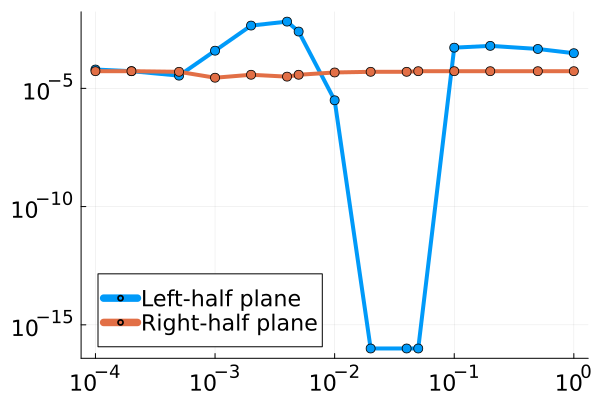

In [25]:
p_r=Plots.plot();
p_r=plot!(Delta_x.*(-1),vec(r_left),lw=4,label="Left-half plane",legend=:bottomleft,marker=(:circle,5),xtickfontsize=15,
    ytickfontsize=15,legendfontsize=15,xaxis=:log,yaxis=:log);
p_r=plot!(Delta_x.*(-1),vec(r_right),lw=4,label="Right-half plane",legend=:bottomleft,marker=(:circle,5),xtickfontsize=15,
    ytickfontsize=15,legendfontsize=15,xaxis=:log,yaxis=:log)

For the mean $\langle\mu(x,\Delta x)\rangle$, we have

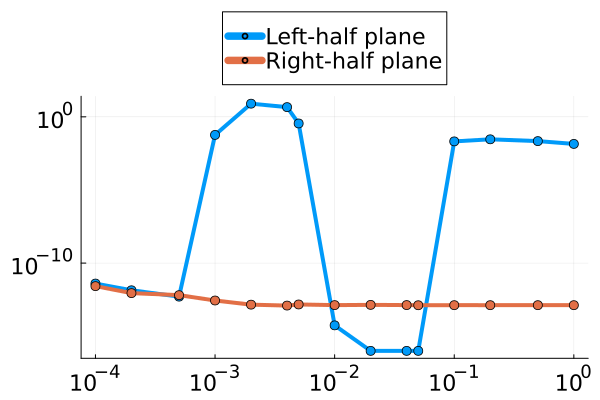

In [26]:
p_v=Plots.plot();
p_v=plot!(Delta_x.*(-1),vec(v_left),lw=4,label="Left-half plane",legend=:outertop,marker=(:circle,5),xtickfontsize=15,
    ytickfontsize=15,legendfontsize=15,xaxis=:log,yaxis=:log);
p_v=plot!(Delta_x.*(-1),vec(v_right),lw=4,label="Right-half plane",legend=:outertop,marker=(:circle,5),xtickfontsize=15,
    ytickfontsize=15,legendfontsize=15,xaxis=:log,yaxis=:log)

For the error plot, we have

In [31]:
β=2;
xx=-2;
Delta_x=[-1,-0.5,-0.2,-0.1,-0.05,-0.04,-0.02,-0.01,-0.005,-0.004,-0.002,-0.001,-0.0005,-0.0002,-0.0001];
err=zeros(1,length(Delta_x));
for i=1:length(Delta_x)
    dx=Delta_x[i];
    result_cdf=TW(β;x0=floor(13/sqrt(β)),method="spectral",step="bdf3",interp=false,Δx_s=dx);
    x_cdf=result_cdf[1];F_cdf=result_cdf[2];
    ind3=findall(x -> x == xx, x_cdf)[1];
    err[i]=abs(F_cdf[ind3]-0.413224142505122554688080761371718196004467389478519013570048867377940492061113133);
end
for j=1:length(err)
    if err[j]>1
        err[j]=1
    end
end

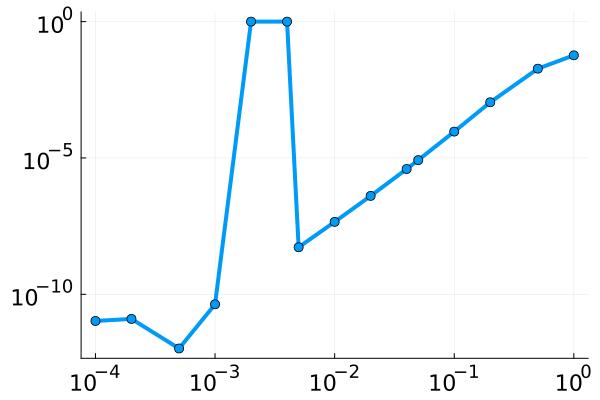

In [32]:
p_e=Plots.plot();
p_e=plot!(Delta_x.*(-1),vec(err),lw=4,legend=false,marker=(:circle,5),xtickfontsize=15,ytickfontsize=15,xaxis=:log,yaxis=:log)

For the absolute stability region and unstable eigenvalues, we have

In [29]:
function convergence_stability(α,β)
    θ = 0:0.01(1+rand()/10):2*π # random perturbation to avoid singularities
    z = map(t -> R(α,β,exp(1im*t)),θ);
    xrange=[-2.,8.];
    yrange=[-5.,5.];
    contourf(xrange[1]:0.01:xrange[2],yrange[1]:0.01(1+rand()/10):yrange[2],(x,y)-> root_condition(α,β,x+1im*y),colorbar=false,
        xtickfontsize=15,ytickfontsize=15,legendfontsize=15,color=:turbo)
    plot!(real(z),imag(z),xlim=xrange,ylim=yrange,aspectratio=1,legend=false,lw=5,linecolor=:orange,xtickfontsize=15,ytickfontsize=15,
        legendfontsize=10)
end
α = [11/6,-3,3/2,-1/3];β = [1,0,0,0];
plot_small=convergence_stability(α,β);
plot_small=Plots.scatter!(Z_left,c=:pink,lw=0.005,xlabel="",ylabel="",markerstrokecolor=:white,xtickfontsize=15,ytickfontsize=15);
plot_small=Plots.scatter!(Z_right,c=:red,lw=0.005,xlabel="",ylabel="",markerstrokecolor=:white,xtickfontsize=15,ytickfontsize=15)

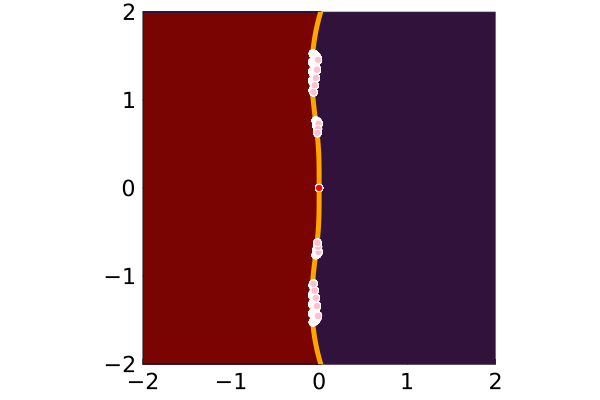

In [30]:
function convergence_stability(α,β)
    θ = 0:0.01(1+rand()/10):2*π # random perturbation to avoid singularities
    z = map(t -> R(α,β,exp(1im*t)),θ);
    xrange=[-2.,2.];
    yrange=[-2.,2.];
    contourf(xrange[1]:0.01:xrange[2],yrange[1]:0.01(1+rand()/10):yrange[2],(x,y)-> root_condition(α,β,x+1im*y),colorbar=false,
        xtickfontsize=15,ytickfontsize=15,legendfontsize=15,color=:turbo)
    plot!(real(z),imag(z),xlim=xrange,ylim=yrange,aspectratio=1,legend=false,lw=5,linecolor=:orange,xtickfontsize=15,ytickfontsize=15,
        legendfontsize=10)
end
α = [11/6,-3,3/2,-1/3];β = [1,0,0,0];
plot_large=convergence_stability(α,β);
plot_large=Plots.scatter!(Z_left,c=:pink,lw=0.005,xlabel="",ylabel="",markerstrokecolor=:white,xtickfontsize=15,ytickfontsize=15,
    legendfontsize=10);
plot_large=Plots.scatter!(Z_right,c=:red,lw=0.005,xlabel="",ylabel="",markerstrokecolor=:white,xtickfontsize=15,ytickfontsize=15,
    legendfontsize=10)

The gap is about $[-0.004,-0.002]$ for BDF3.